# Kernel CSDA

Siguendo a Potworosky et al, vamos a implementar el kCSDA aquí y tratar de hacer que funcione bien.


### Problema 1 a) Calcular $b_j (x_k)$

Usa tu cabeza chico: en realidad sólo necesitas una TABLOTA de los valores de la integral resuelta, de forma que cubra toda la matriz para cualquier $x_k$ válido que escogas, lo que haría que *"solo"* tuvieras que resolver los valores para una malla de $129·129$ puntos o algo asi: pero tienes simetría rotacional respecto al centro $j$-
ésimo, así que en realidad puedes reducir esto bastante: calculemos esto en una rebanada de un octavo de cuadrado (un cuadrante de la matriz reducido a la mitad). Para "ahorrarme" trabajo después copiare los resultados en todos los octantes y guardare la tabla como una matrizota.

Pero antes... quiero ver como se VE la función que voy a integrar.

In [1]:
using PyPlot

In [24]:
function duro(x::Number, r::Number)
    if abs(x)<r
        return 1.0
    else
        return 0
    end
end


function suave(x::Number, r::Number)
    result=exp(-x^2/(2*r))
    return result
end

function bkerneldura(x::Number)
    xcero=1
    h=1.0
    radio=2
        result=asinh(h/sqrt((x-xcero)^2))*duro(x-xcero,radio)
    return result
end

function bkernelsuave(x::Number)
    xcero=1
    h=1.0
    radio=2
    result=asinh(h/sqrt((x-xcero)^2))*suave(x-xcero,radio)
    return result
end



bkernelsuave (generic function with 1 method)

In [22]:
xxs=0:0.02:5
yys=map(bkerneldura,xxs);
otrayys=map(bkernelsuave,xxs);

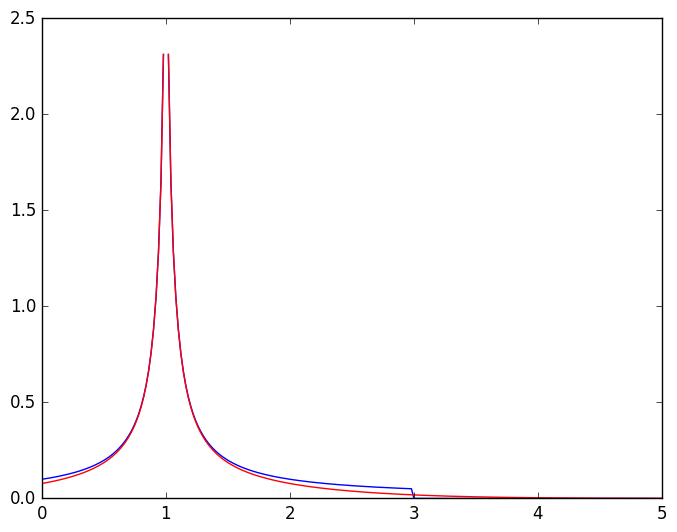

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9642afd320>

In [23]:
plot(xxs,yys,c="blue")
plot(xxs,otrayys,c="red")


Bien. Parece que los dos se parecen mucho cerca de la singularidad, y que no hay nada que ver después de 2 distancias de R, en la imagen de arriba tenemos que R=2, xcero=1, h=1. 

In [37]:
function distancia2d(x1::Number,y1::Number,x2::Number,y2::Number)
    result=sqrt((x1-x2)^2+(y1-y2)^2)
    return result
end

function distancia2d(x1::Array,x2::Array)
    result=distancia2d(x1[1],x1[2],x2[1],x2[2])
    return result
end

distancia2d (generic function with 3 methods)

In [38]:
a=[1.0,2.0]

b=[0.0,0.0]

2-element Array{Float64,1}:
 0.0
 0.0

In [36]:
distancia2d(0.1,2,0.7,0.1)

1.9924858845171274

In [39]:
distancia2d(a,b)

2.23606797749979

In [40]:
sqrt(5)

2.23606797749979